In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

# Задание 1

In [2]:
from scipy.optimize import rosen

def f(x,y):
    return x**2 + y**2 + 1

In [3]:
#a
def dfdx(x,y):
    return 2*x

def dfdy(x,y):
    return 2*y

# gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])



In [4]:
def grad_descent_stoh(df,x_prev,learn_rate):    
    epsilon = 0.001
    grad_itter = 1
    seq_x = []
    seq_y = []
    rand1= random.randint(0, len(x_prev)-1)
    rand2= random.randint(0, len(x_prev)-1)
    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[rand1],x_prev[rand2]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        rand1= random.randint(0, len(x_prev)-1)
        rand2= random.randint(0, len(x_prev)-1)
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[rand1],x_prev[rand2])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

In [5]:
def grad_descent_mult(df,x_prev,learn_rate):
    epsilon = 0.001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

# Задание 2

In [6]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    #print(X,Y)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

Minimum (x,y) from gradient descent: [0.0010156  0.00033853]
Number of gradient descent iterations: 17


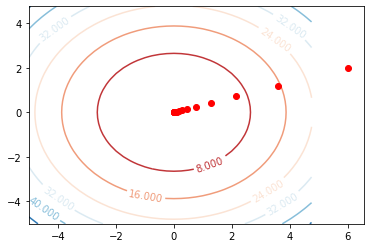

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#plot function
y = np.arange(-5, 5, 0.25)
x = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

Minimum (x,y) from gradient descent: [ 0.00513028 -0.00086496]
Number of gradient descent iterations: 71


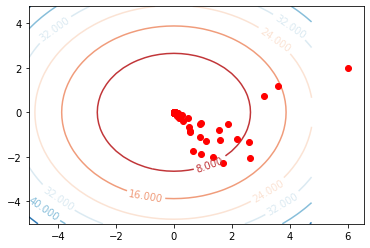

In [8]:
grad_stoch_output = grad_descent_stoh(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_stoch_output[0])
print('Number of gradient descent iterations: %s' %grad_stoch_output[1])

contour_plot(grad_stoch_output[2],grad_stoch_output[3], np.array([6,2]))

# Задание 3

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
import numpy
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils

In [10]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')
df=bioresponce

In [11]:
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:, 1:]
target_column = ['Activity'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.614318,0.071728,0.038990,0.212112,0.690288,0.347372,0.459791,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.109770,0.082541,0.115885,0.102592,0.079119,0.113826,0.164397,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.292548,0.000000,0.000000,0.002630,0.138603,0.007751,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.536936,0.000000,0.000000,0.138118,0.628939,0.262223,0.381931,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.607633,0.052632,0.000000,0.190926,0.677605,0.351333,0.505058,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.693082,0.105263,0.000000,0.261726,0.744584,0.424636,0.575795,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(2625, 1776)
(1126, 1776)


In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [47]:
model = tensorflow.keras.Sequential()
model.add(Dense(1000, activation='relu',kernel_initializer='normal', input_dim=1776))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [48]:
history_Adam = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)

ValueError: A target array with shape (2625, 2) was passed for an output of shape (None, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

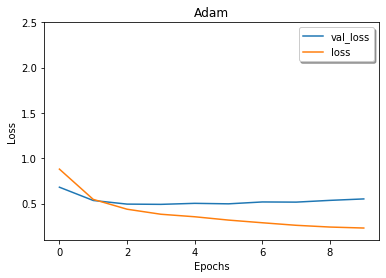

In [40]:
optimizers = ['Adam']
#fig, axs = plt.subplots(1, 2, figsize = (20, 5))
fig,axs=plt.subplots()
for i, h in enumerate([history_Adam]):
    axs.set_ylim(0.1, 2.5)
    axs.plot(h.history['val_loss'], label='val_loss')
    axs.plot(h.history['loss'] , label='loss')
    axs.set_xlabel("Epochs")
    axs.set_ylabel("Loss")
    axs.set_title(optimizers[i])
    axs.legend(shadow=True, loc=1)

plt.show()